**VERIFYING THE ACCURACIES OF VARIOUS MACHINE LEARNING ALGORITHMS ON GENDER CLASSIFICATION DATASET TO CLASSIFY THE GENDER (BINARY CLASSIFICATION PROBLEM)** 

**Import essential libraries**

In [8]:
import warnings
warnings.filterwarnings('ignore')

#for data analysis and data visualization 
import numpy as np
import pandas as pd
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#machine learning algorihms
#(1)Decision Tree
#(2)Random Forest
#(3)k-NN
#(4)Logistic Regression
#(5)SVM (Linear)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

**Load the dataset**

In [13]:
data = pd.read_csv("https://raw.githubusercontent.com/bharadhwaj02/Gender-classification/main/gender_classification.csv")

TypeError: ignored

**Analyze by describing data**

In [14]:
data.shape

(5001, 8)

In [ ]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
data.tail()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female
5000,1,15.4,5.4,1,1,1,1,Male


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['gender']=le.fit_transform(data['gender'])
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [ ]:
#info of various features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 312.7 KB


In [ ]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.00000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900,0.49990
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049,0.50005
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000,0.00000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000,1.00000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000,1.00000


**Visualization of gender Column**

In [ ]:
data.gender.value_counts()

0    2501
1    2500
Name: gender, dtype: int64

Text(0.5, 1.0, 'Number of Male and Female')

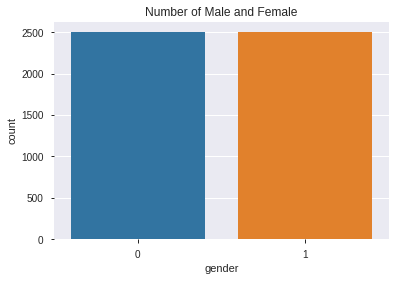

In [ ]:
sns.countplot(data.gender)
plt.xlabel("gender")
plt.title("Number of Male and Female")

**Splitting into test and train datasets**

In [ ]:
X = data.iloc[:,0:7]

In [ ]:
X

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [ ]:
Y = data['gender'].ravel()

In [ ]:
Y

array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size = 0.30,random_state=42)

In [ ]:
X_train.shape, X_test.shape,Y_train.shape,Y_test.shape

((3500, 7), (1501, 7), (3500,), (1501,))

**Testing the accuracy of various ML Algorithms on Gender Classification dataset**

**CONFUSION MATRIX :**

**If we consider a binary classification problem,**

**1. Confusion_Matrix[0][0] = True Negative(TN)**

**2. Confusion_Matrix[0][1] = False Postive(FP)**

**3. Confusion_Matrix[1][0] = False Negative(FN)**

**4. Confusion_Matrix[1][1] = True Postive(TP)**









**ACCURACY :**

**Accuracy = (TP+TN)/(TP+TN+FP+FN)**

**PRECISION:**

**Precision = TP/(TP+FP)**

**RECALL:**

**Recall = TP/(TP+FN)**

**F1 SCORE :**

**F1 Score = 2 * Precision * Recall/(Precision+Recall)**

Decision Tree

In [ ]:
import timeit

In [ ]:
start = timeit.default_timer()
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
end = timeit.default_timer()
time_id3 = end-start

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[709  30]
 [ 35 727]]


In [ ]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

#accuracy
accuracy_id3 = (TP+TN)/(TP+TN+FP+FN)

#precision
precision = TP/(TP+FP)

#recall
recall = TP/(TP+FN)

#f1_score 
f1_score = (2*(precision)*(recall))/(precision+recall)

print("Accuracy = ",accuracy_id3)
print("Precision = ",precision)
print("Recall = ",recall)
print("F1_Score = ",f1_score)

Accuracy =  0.9566955363091273
Precision =  0.9603698811096433
Recall =  0.9540682414698163
F1_Score =  0.9572086899275839


Random Forest

In [ ]:
start = timeit.default_timer()
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier().fit(X_train, Y_train)
Y_pred1 = classifier.predict(X_test)
end = timeit.default_timer()
time_rf = end-start

In [ ]:
zzz=X_test.iloc[[0,1], :]

In [ ]:
 classifier.predict(zzz)

array([1, 0])

In [ ]:
Y_pred1

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(Y_test, Y_pred1)
print('Confusion Matrix')
print(cm1)

Confusion Matrix
[[712  27]
 [ 31 731]]


In [ ]:
TP1 = cm1[1][1]
TN1 = cm1[0][0]
FP1 = cm1[0][1]
FN1 = cm1[1][0]

#accuracy
accuracy_rf = (TP1+TN1)/(TP1+TN1+FP1+FN1)

#precision
precision_1 = TP1/(TP1+FP1)

#recall
recall_1 = TP1/(TP1+FN1)

#f1_score 
f1_score_1 = (2*(precision_1)*(recall_1))/(precision_1+recall_1)

print("Accuracy = ",accuracy_rf)
print("Precision = ",precision_1)
print("Recall = ",recall_1)
print("F1_Score = ",f1_score_1)

Accuracy =  0.9613590939373751
Precision =  0.9643799472295514
Recall =  0.9593175853018373
F1_Score =  0.9618421052631579


K-NN

In [ ]:
start = timeit.default_timer()
knn = KNeighborsClassifier(n_neighbors = 29)
knn.fit(X_train, Y_train)
Y_pred2 = knn.predict(X_test)
end = timeit.default_timer()
time_knn = end-start

In [ ]:
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(Y_test, Y_pred2)
print('Confusion Matrix')
print(cm2)

Confusion Matrix
[[726  13]
 [ 37 725]]


In [ ]:
TP2 = cm2[1][1]
TN2 = cm2[0][0]
FP2 = cm2[0][1]
FN2 = cm2[1][0]

#accuracy
accuracy_knn = (TP2+TN2)/(TP2+TN2+FP2+FN2)

#precision
precision_2 = TP2/(TP2+FP2)

#recall
recall_2 = TP2/(TP2+FN2)

#f1_score 
f1_score_2 = (2*(precision_2)*(recall_2))/(precision_2+recall_2)

print("Accuracy = ",accuracy_knn)
print("Precision = ",precision_2)
print("Recall = ",recall_2)
print("F1_Score = ",f1_score_2)

Accuracy =  0.966688874083944
Precision =  0.9823848238482384
Recall =  0.9514435695538058
F1_Score =  0.9666666666666666


logistic regression

In [ ]:
start = timeit.default_timer()
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred3 = logreg.predict(X_test)
end = timeit.default_timer()
time_lr = end-start

In [ ]:
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(Y_test, Y_pred3)
print('Confusion Matrix')
print(cm3)

Confusion Matrix
[[715  24]
 [ 30 732]]


In [ ]:
TP3 = cm3[1][1]
TN3 = cm3[0][0]
FP3 = cm3[0][1]
FN3 = cm3[1][0]
#accuracy
accuracy_lr = (TP3+TN3)/(TP3+TN3+FP3+FN3)

#precision
precision_3 = TP3/(TP3+FP3)

#recall
recall_3 = TP3/(TP3+FN3)

#f1_score 
f1_score_3 = (2*(precision_3)*(recall_3))/(precision_3+recall_3)

print("Accuracy = ",accuracy_lr)
print("Precision = ",precision_3)
print("Recall = ",recall_3)
print("F1_Score = ",f1_score_3)

Accuracy =  0.9640239840106596
Precision =  0.9682539682539683
Recall =  0.9606299212598425
F1_Score =  0.9644268774703557


SVM (linear)


In [ ]:
start = timeit.default_timer()
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred4 = linear_svc.predict(X_test)
end = timeit.default_timer()
time_svm = end-start

In [ ]:
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(Y_test, Y_pred4)
print('Confusion Matrix')
print(cm4)

Confusion Matrix
[[699  40]
 [ 16 746]]


In [ ]:
TP4 = cm4[1][1]
TN4 = cm4[0][0]
FP4 = cm4[0][1]
FN4 = cm4[1][0]
#accuracy
accuracy_svm = (TP4+TN4)/(TP4+TN4+FP4+FN4)

#precision
precision_4 = TP4/(TP4+FP4)

#recall
recall_4 = TP4/(TP4+FN4)

#f1_score 
f1_score_4 = (2*(precision_4)*(recall_4))/(precision_4+recall_4)

print("Accuracy = ",accuracy_svm)
print("Precision = ",precision_4)
print("Recall = ",recall_4)
print("F1_Score = ",f1_score_4)

Accuracy =  0.9626915389740173
Precision =  0.9491094147582697
Recall =  0.979002624671916
F1_Score =  0.9638242894056847


[0.006695536309127337, 0.011359093937375109, 0.01668887408394404, 0.01402398401065963, 0.012691538974017313]


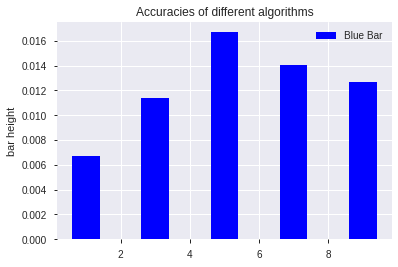

In [ ]:
import matplotlib.pyplot as plt
# Look at index 4 and 6, which demonstrate overlapping cases.
x1 = [1,3,5,7,9]
accuracy = [(accuracy_id3-0.95),accuracy_rf-0.95,accuracy_knn-0.95,accuracy_lr-0.95,accuracy_svm-0.95]
print(accuracy)
plt.bar(x1, accuracy, label="Blue Bar", color='b')
plt.plot()
plt.xlabel("")
plt.ylabel("bar height")
plt.title("Accuracies of different algorithms")
plt.legend()
plt.show()

[0.006695536309127337, 0.011359093937375109, 0.01668887408394404, 0.01402398401065963, 0.012691538974017313]


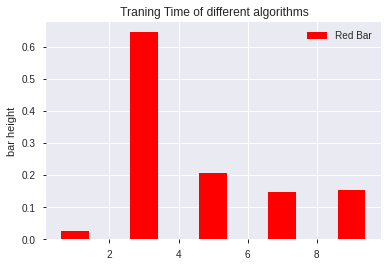

In [ ]:
import matplotlib.pyplot as plt
# Look at index 4 and 6, which demonstrate overlapping cases.
x1 = [1,3,5,7,9]
time = [(time_id3-0),time_rf-0,time_knn-0,time_lr-0,time_svm-0]
print(accuracy)
plt.bar(x1, time, label="Red Bar", color='r')
plt.plot()
plt.xlabel("")
plt.ylabel("bar height")
plt.title(" Traning Time of different algorithms")
plt.legend()
plt.show()